In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('insurance.csv')

# Detention

In [3]:
def find_skw_oulier(df, var, distance):
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25) #Q3-Q1
    
    upper_limit = df[var].quantile(0.25) - (IQR * distance)
    lower_limit = df[var].quantile(0.75) + (IQR * distance)
    
    print('Upper Limit:',upper_limit), print('Lower Limit:',lower_limit)

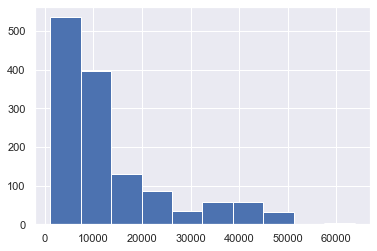

<AxesSubplot:ylabel='charges'>

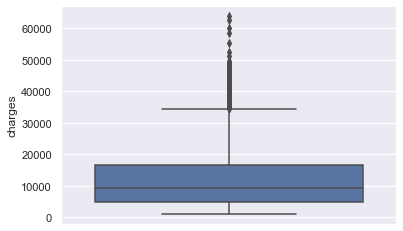

In [4]:
plt.hist(df['charges'])
plt.show()
sns.boxplot(y = df['charges'])

In [5]:
find_skw_oulier(df, 'charges', 1.5)

Upper Limit: -13109.1508975
Lower Limit: 34489.350562499996


# Outlier Removal

In [23]:
from feature_engine.outliers import Winsorizer

In [24]:
Winsorizer = Winsorizer( capping_method = 'iqr',
            tail = 'right',
            fold = 1.5,
            variables = 'charges')

In [26]:
df_clean = Winsorizer.fit_transform(df)

<AxesSubplot:ylabel='charges'>

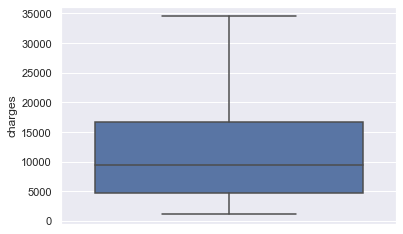

In [30]:
plt.show()
sns.boxplot(y = df_clean['charges'])